# Methane detection hackathon

### Goal : detect methane leaks in the atmosphere based on satelite images

It's a binary classification problem : does the image contain a plume of methane or not ?

In order to do that, a dataset containing images in `tif` format is provided along with metadata including :
* path
* date the satelite image was taken
* class (`plume` or `no_plume`)
* an ID identifying the location
* latitude and longitude coordinates locating the center of the plume (`lat`,`lon`)
* pixel coordinates locating the center of the plume in the image (`coord_x`,`coord_y`). Please be midnful that the axis origin (0,0) is at the top left corner of the image

The dataset contains two folders:
- `plume` : contains all images with plumes of methane.
- `no_plume` : contains all images with no plume of methane.


**All images have a resolution of 64x64 and they are in gray scale (2D-arrays).**

Images names are written in the following format `{date}_methane_mixing_ratio_id_{location id}.tif`

In [3]:
len(pd.read_csv("metadata.csv"))

430

### 1. Install requirements

In [ ]:
!pip install rasterio, pandas

### 2. Import statements

In [7]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.plot import show, show_hist
import warnings
warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)
import os
import random
import matplotlib.pyplot as plt

### 3. Read an image

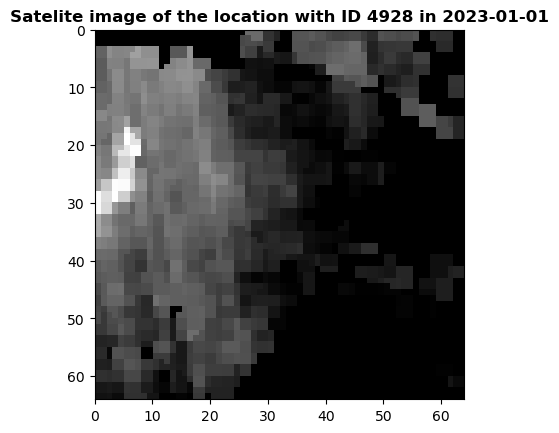

<AxesSubplot:title={'center':'Satelite image of the location with ID 4928 in 2023-01-01'}>

In [2]:
path = "images/plume/20230101_methane_mixing_ratio_id_4928.tif"
example_image = rasterio.open(path)
show(example_image, cmap="Greys_r", title="Satelite image of the location with ID 4928 in 2023-01-01")

### 4. Distribution of pixel intensity in greyscale

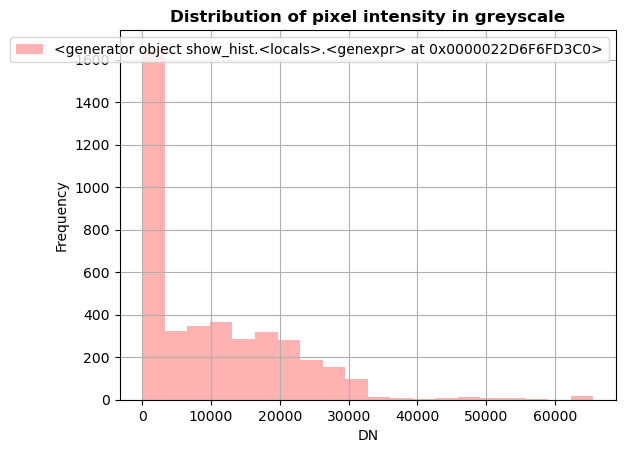

In [3]:
show_hist(example_image, bins=20,alpha=0.3, title="Distribution of pixel intensity in greyscale")

### 5. Metadata

In [9]:
metadata = pd.read_csv("metadata.csv")

In [8]:
metadata.head(5)

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...


### 6. Data visualisation

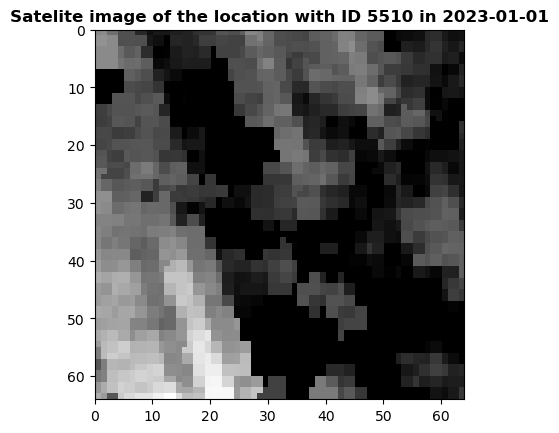

<AxesSubplot:title={'center':'Satelite image of the location with ID 5510 in 2023-01-01'}>

In [4]:
path = "images/no_plume/20230101_methane_mixing_ratio_id_5510.tif"
example_image = rasterio.open(path)
show(example_image, cmap="Greys_r", title="Satelite image of the location with ID 5510 in 2023-01-01")

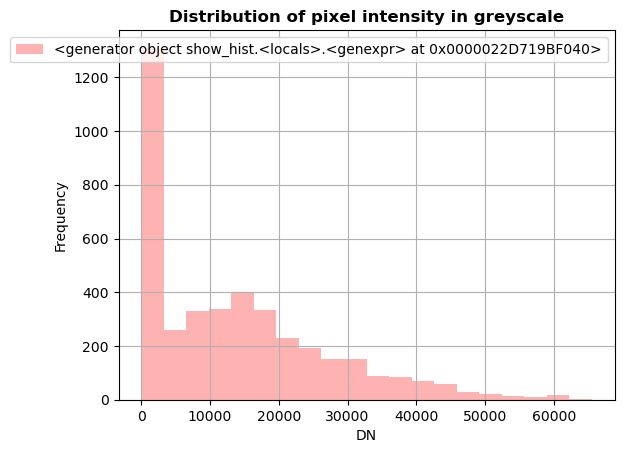

In [6]:
show_hist(example_image, bins=20, alpha=0.3, title="Distribution of pixel intensity in greyscale")

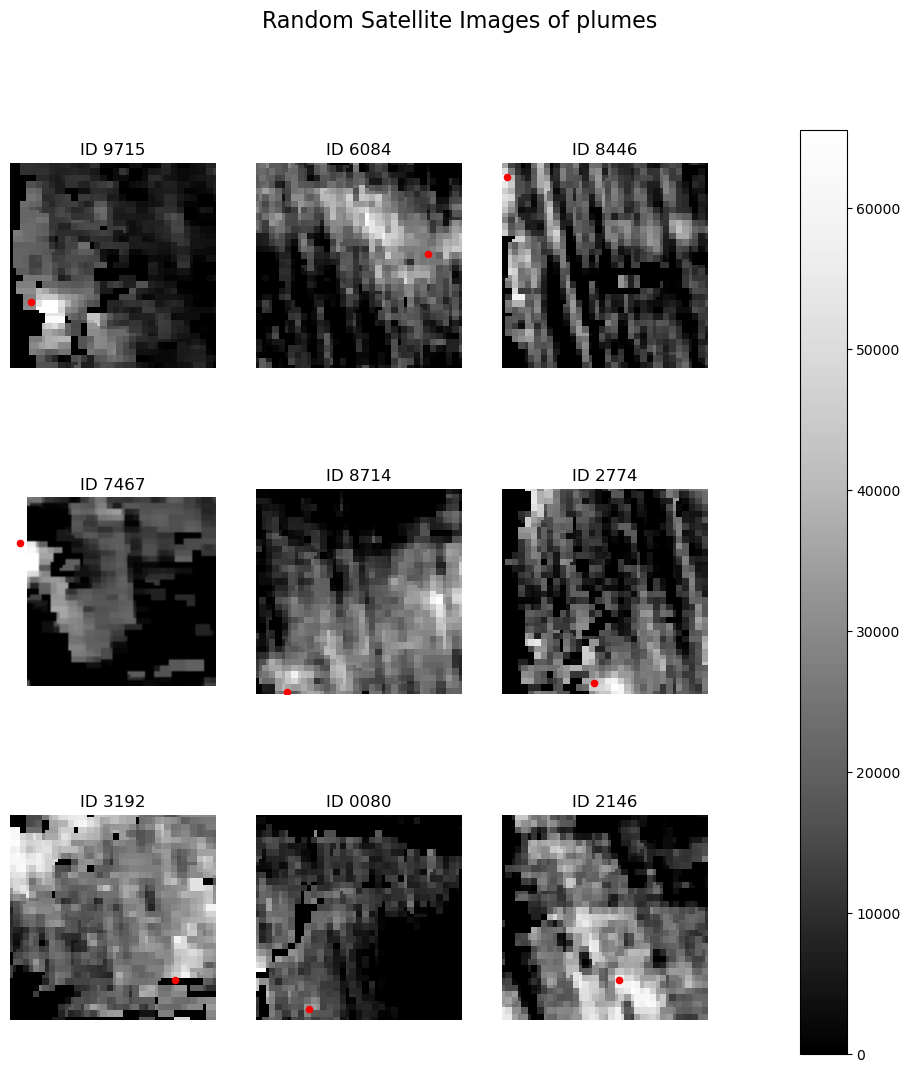

In [10]:
folder_path = "images/plume/"

# Liste de tous les fichiers dans le dossier
image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Choisir aléatoirement 9 fichiers
random_images = random.sample(image_files, 9)

# Créer une figure avec 3 lignes et 3 colonnes de sous-graphiques
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Itérer sur les fichiers choisis aléatoirement et afficher les images
for i, image_file in enumerate(random_images):
    # Construire le chemin complet du fichier
    image_path = os.path.join(folder_path, image_file)
    
    # Ouvrir l'image avec rasterio
    example_image = rasterio.open(image_path)
    image_ID = image_file.split('_')[-1][:-4]
    image_date = int(image_file.split('_')[0])
    plume = metadata.loc[(metadata["id_coord"] == f"id_{image_ID}") & (metadata["date"] == image_date)]
    
    # Afficher l'image sur le sous-graphique correspondant
    axs[i // 3, i % 3].imshow(example_image.read(1), cmap="Greys_r")
    axs[i // 3, i % 3].set_title(f"ID {image_ID}")
    axs[i // 3, i % 3].axis('off')
    
    axs[i // 3, i % 3].scatter(plume["coord_y"], plume["coord_x"], color='red', s=20)

cbar = fig.colorbar(axs[-1, -1].get_images()[0], ax=axs, orientation='vertical', pad=0.1)

plt.suptitle("Random Satellite Images of plumes", fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la disposition pour inclure le titre
plt.show()

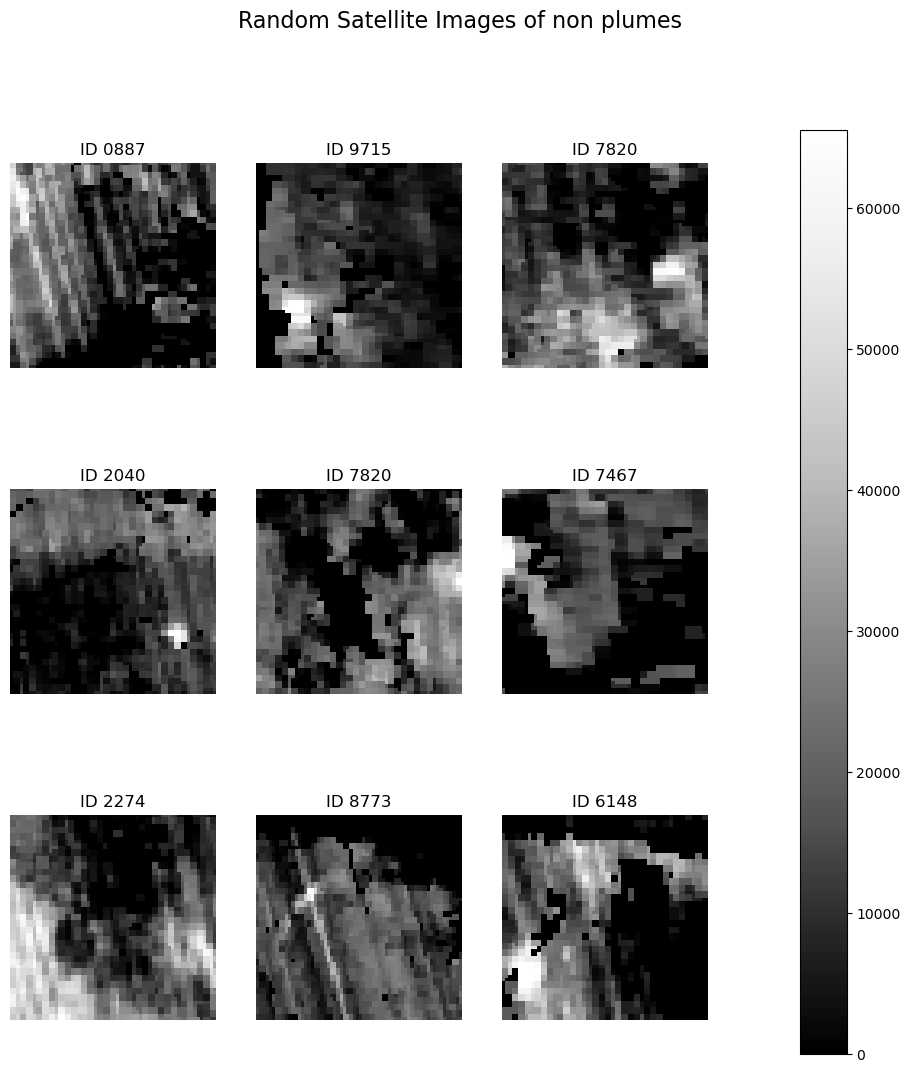

In [11]:
folder_path_plume = "images/no_plume/"

# Liste de tous les fichiers dans le dossier
image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Choisir aléatoirement 9 fichiers
random_images = random.sample(image_files, 9)

# Créer une figure avec 3 lignes et 3 colonnes de sous-graphiques
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Itérer sur les fichiers choisis aléatoirement et afficher les images
for i, image_file in enumerate(random_images):
    # Construire le chemin complet du fichier
    image_path = os.path.join(folder_path, image_file)
    
    # Ouvrir l'image avec rasterio
    example_image = rasterio.open(image_path)
    image_ID = image_file.split('_')[-1][:-4]
    image_date = int(image_file.split('_')[0])
    plume = metadata.loc[(metadata["id_coord"] == f"id_{image_ID}") & (metadata["date"] == image_date)]
    
    # Afficher l'image sur le sous-graphique correspondant
    axs[i // 3, i % 3].imshow(example_image.read(1), cmap="Greys_r")
    axs[i // 3, i % 3].set_title(f"ID {image_ID}")
    axs[i // 3, i % 3].axis('off')
    

cbar = fig.colorbar(axs[-1, -1].get_images()[0], ax=axs, orientation='vertical', pad=0.1)

plt.suptitle("Random Satellite Images of non plumes", fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la disposition pour inclure le titre
plt.show()

9715


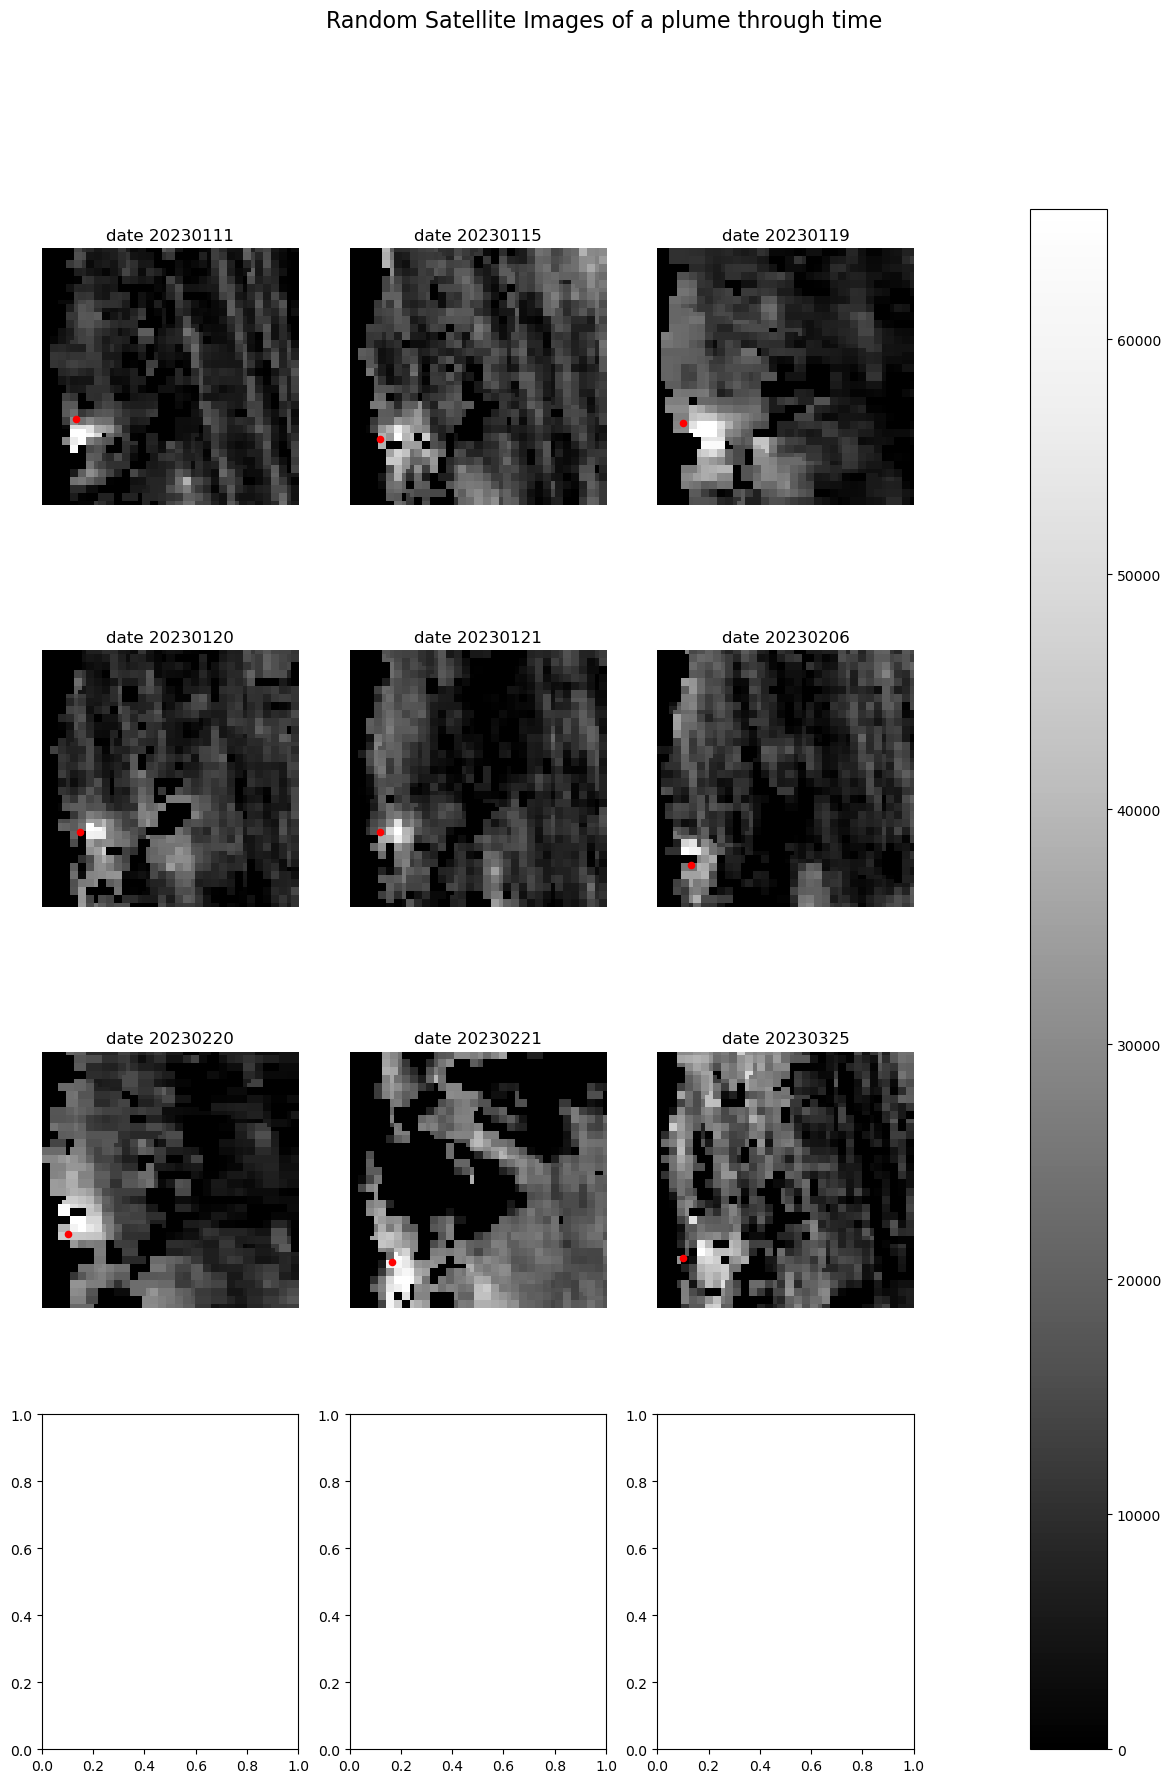

In [21]:
# Liste de tous les fichiers dans le dossier
folder_path_plume = 'images/plume/'
image_files = [f for f in os.listdir(folder_path_plume) if f.endswith(".tif")]

# Choisir aléatoirement 1 location
N = 0
while (N<=3):
    image_file = random.sample(image_files, 1)[0]
    image_ID = image_file.split('_')[-1][:-4]
    this_loc = metadata.loc[metadata["id_coord"]==f"id_{image_ID}"].sort_values(by="date")
    N = len(this_loc)

this_loc_dates = this_loc['date'].to_numpy()
this_loc_paths = this_loc['path'].to_numpy()
this_plumes_x = this_loc['coord_x'].to_numpy()
this_plumes_y = this_loc['coord_y'].to_numpy()

# Créer une figure avec N/3 lignes et 3 colonnes de sous-graphiques
fig, axs = plt.subplots(N//3 + 1, 3, figsize=(15, 20))

# Itérer sur les fichiers choisis aléatoirement et afficher les images
for i in range(N):
    
    plume_image = rasterio.open(this_loc_paths[i] + ".tif")
    arr_plume = plume_image.read(1)
    # Afficher l'image sur le sous-graphique correspondant
    axs[i // 3, i % 3].imshow(arr_plume, cmap="Greys_r")
    axs[i // 3, i % 3].set_title(f"date {this_loc_dates[i]}")
    axs[i // 3, i % 3].axis('off')
    x_plume = this_plumes_x[i]
    y_plume = this_plumes_y[i]
    axs[i // 3, i % 3].scatter(y_plume, x_plume, color='red', s=20)

if (N%3 == 0):
    a,b = -2,2
elif (N%3 == 1):
    a,b = -1,0
else:
    a,b = -1,1

cbar = fig.colorbar(axs[a,b].get_images()[0], ax=axs, orientation='vertical', pad=0.1)

plt.suptitle(f"Random Satellite Images of a plume {image} through time", fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la disposition pour inclure le titre
plt.show()

In [22]:
negative_coordinates_rows = metadata[(metadata['coord_x'] < 0) | (metadata['coord_y'] < 0)]
negative_coordinates_rows

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path,id_code
6,20230129,id_6464,yes,train,27.007500,81.040000,21,-2,images/plume/20230129_methane_mixing_ratio_id_...,6464
19,20230216,id_8446,yes,train,22.930625,72.536875,4,-2,images/plume/20230216_methane_mixing_ratio_id_...,8446
59,20230220,id_6464,yes,train,27.007500,81.040000,19,-1,images/plume/20230220_methane_mixing_ratio_id_...,6464
61,20230326,id_7467,yes,train,38.740000,54.246667,15,-3,images/plume/20230326_methane_mixing_ratio_id_...,7467
121,20230228,id_8446,yes,train,22.930625,72.536875,7,-8,images/plume/20230228_methane_mixing_ratio_id_...,8446
135,20230312,id_6464,yes,train,27.007500,81.040000,21,-3,images/plume/20230312_methane_mixing_ratio_id_...,6464
189,20230324,id_4928,yes,train,38.633636,54.236364,20,-1,images/plume/20230324_methane_mixing_ratio_id_...,4928
194,20230218,id_8446,yes,train,22.930625,72.536875,4,-2,images/plume/20230218_methane_mixing_ratio_id_...,8446
197,20230329,id_0887,yes,train,38.475000,54.250000,24,-1,images/plume/20230329_methane_mixing_ratio_id_...,887
199,20230207,id_8446,yes,train,22.930625,72.536875,8,-9,images/plume/20230207_methane_mixing_ratio_id_...,8446


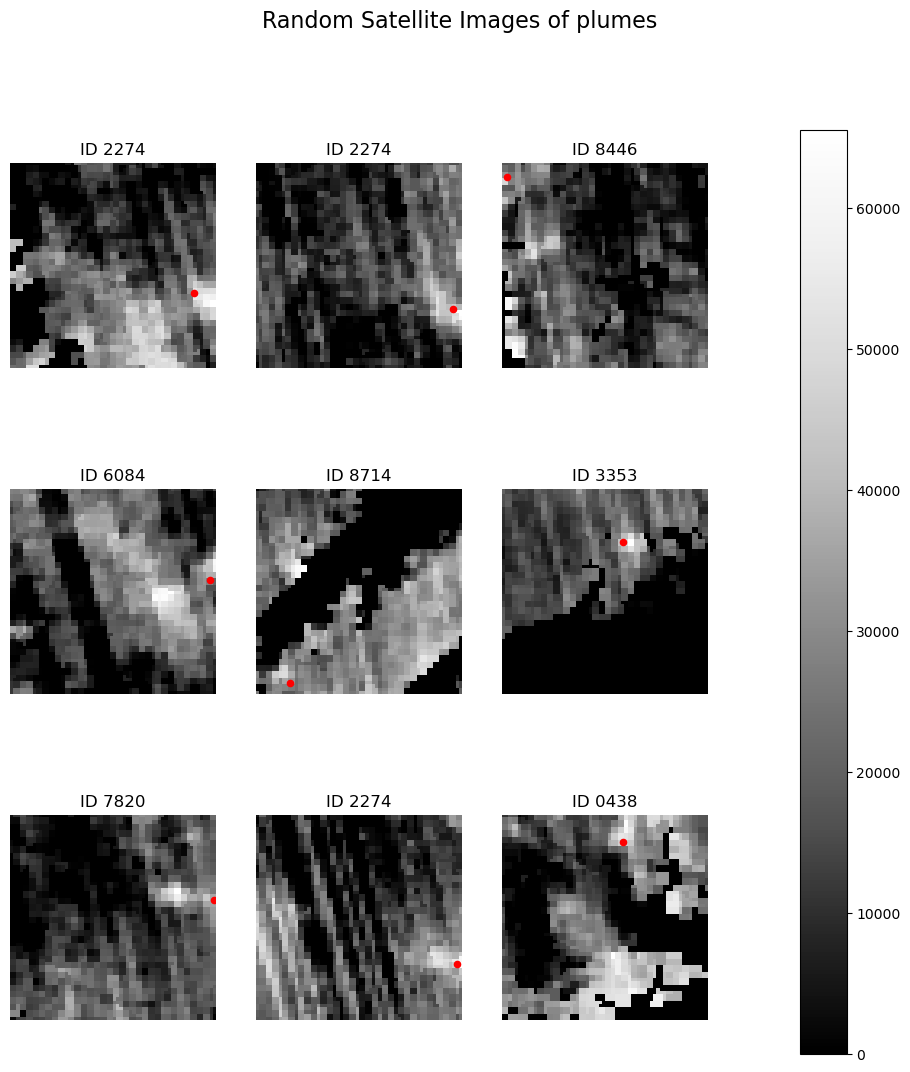

In [24]:
# Liste de tous les fichiers dans le dossier
image_files = [f for f in os.listdir(folder_path) if f.endswith(".tif")]

# Choisir aléatoirement 9 fichiers
random_images = random.sample(image_files, 9)

# Créer une figure avec 3 lignes et 3 colonnes de sous-graphiques
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Itérer sur les fichiers choisis aléatoirement et afficher les images
for i, image_file in enumerate(random_images):
    # Construire le chemin complet du fichier
    image_path = os.path.join(folder_path, image_file)
    
    # Ouvrir l'image avec rasterio
    example_image = rasterio.open(image_path)
    image_ID = image_file.split('_')[-1][:-4]
    image_date = int(image_file.split('_')[0])
    plume = metadata.loc[(metadata["id_coord"] == f"id_{image_ID}") & (metadata["date"] == image_date)]
    
    # Afficher l'image sur le sous-graphique correspondant
    axs[i // 3, i % 3].imshow(example_image.read(1), cmap="Greys_r")
    axs[i // 3, i % 3].set_title(f"ID {image_ID}")
    axs[i // 3, i % 3].axis('off')
    
    axs[i // 3, i % 3].scatter(plume["coord_y"], plume["coord_x"], color='red', s=20)

cbar = fig.colorbar(axs[-1, -1].get_images()[0], ax=axs, orientation='vertical', pad=0.1)

plt.suptitle("Random Satellite Images of plumes", fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster la disposition pour inclure le titre
plt.show()

In [31]:
plt.hist?

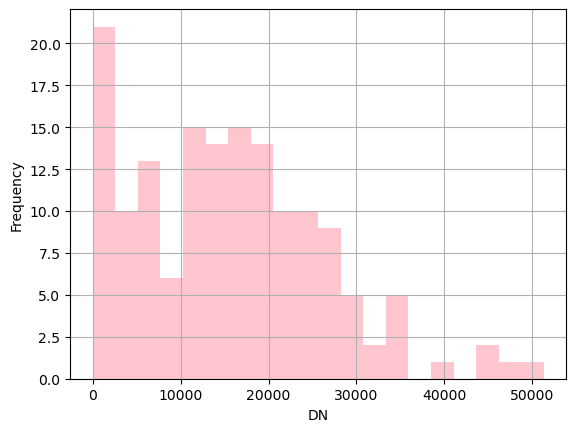

In [119]:
folder_path_plume = 'images/plume/'
image_files = [f for f in os.listdir(folder_path_plume) if f.endswith(".tif")]
average_signal_near_plume_loc = []

for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path_plume, image_file)
    image = rasterio.open(image_path)
    arr_image = image.read(1)
    plume = metadata.loc[metadata["path"]==image_path[:-4]]
    x_plume = plume["coord_x"].to_numpy()[0]
    y_plume = plume["coord_y"].to_numpy()[0]
    a,b = 3,3
    if a<=x_plume<=63-b and a<=y_plume<=63-b:
        neighb = arr_image[y_plume-a:y_plume+b+1, x_plume-a:x_plume+b+1]
        average_signal_near_plume_loc.append(np.mean(neighb))
plt.figure()
plt.hist(average_signal_near_plume_loc,bins = 20,color = "pink",alpha = 0.9)
plt.xlabel("DN")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms

In [79]:
DEVICE = 'cpu'
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding_mode='zeros', device=DEVICE)  # Increased filters
        self.bn1 = nn.BatchNorm2d(16, device=DEVICE)  # Batch normalization
        self.pool = nn.MaxPool2d(2, 2)
        self.dp1 = nn.Dropout2d(0.25)  # Dropout

        self.conv2 = nn.Conv2d(16, 32, 5, device=DEVICE)  # Increased filters
        self.bn2 = nn.BatchNorm2d(32, device=DEVICE)  # Batch normalization

        self.fc1 = nn.Linear(5408, 120, device=DEVICE)  # Adjusted input size
        self.dp2 = nn.Dropout(0.5)  # Dropout after fully connected
        self.fc2 = nn.Linear(120, 48, device=DEVICE)
        self.fc3 = nn.Linear(48, 5, device=DEVICE)
        self.fc4 = nn.Linear(5, 1, device=DEVICE)

    def _up_to_features(self, x):
        # Conv1 + BatchNorm + Activation
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)
        #x = self.dp1(x)

        # Conv2 + BatchNorm + Activation
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)
        #x = self.dp1(x)

        # Flatten
        x = torch.flatten(x, 1)

        # Linear links in between + Dropout + Activation
        x = self.fc1(x)
        x = F.relu(x)
        #x = self.dp2(x)

        x = self.fc2(x)
        x = F.relu(x)

        x = self.fc3(x)
        return x

    def forward(self, x):
        x = self._up_to_features(x)

        x = self.fc4(x)
        x = F.sigmoid(x)

        return x

In [80]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]) # Only one value because gray-scale

In [81]:
model = Net()
model.load_state_dict(torch.load('dernier model.pt',map_location=torch.device('cpu')))


<All keys matched successfully>

In [82]:
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dp1): Dropout2d(p=0.25, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=5408, out_features=120, bias=True)
  (dp2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=48, bias=True)
  (fc3): Linear(in_features=48, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=1, bias=True)
)

In [120]:
df_test = pd.read_csv("sample_submission_file.csv")
image_files_test = df_test["path"].tolist()

In [121]:
# folder_path_plume = "images/plume"
# folder_path_no_plume = "images/no_plume"
folder_path_test = "test data/images"

prediction_test = np.zeros(len(image_files_test))
prediction_test_rounded = np.zeros(len(image_files_test))
for i,image_file in enumerate(image_files_test):
    image_path = folder_path_test+"/"+ image_file
    image = rasterio.open(image_path)
    arr_image = np.asarray(image.read(1), dtype=np.float32)
    arr_image_pytorch = transform(arr_image).unsqueeze(0)
    prediction_test[i] = model(arr_image_pytorch)

In [122]:
df_test["label"] = prediction_test
df_test["prediction value rounded"] = np.round(prediction_test)

In [123]:
df_test["prediction value rounded"].sum()/len(df_test)

0.5412844036697247

In [124]:
df_test.to_csv("submission_file_completed.csv")

In [125]:
df_test.head(50)

,path,label,prediction value rounded
0,20230101_methane_mixing_ratio_id_1503.tif,0.011090,0.0
1,20230101_methane_mixing_ratio_id_7352.tif,0.585686,1.0
2,20230101_methane_mixing_ratio_id_7566.tif,0.447956,0.0
3,20230103_methane_mixing_ratio_id_4574.tif,0.379181,0.0
4,20230103_methane_mixing_ratio_id_5449.tif,0.898657,1.0
5,20230104_methane_mixing_ratio_id_2384.tif,0.148841,0.0
6,20230105_methane_mixing_ratio_id_4690.tif,0.866718,1.0
7,20230106_methane_mixing_ratio_id_7965.tif,0.271568,0.0
8,20230107_methane_mixing_ratio_id_7467.tif,0.881728,1.0
9,20230107_methane_mixing_ratio_id_9907.tif,0.511102,1.0
